# Dataset Description

| Feature | Description |
| :- | :- |
| Unnamed: 0 | Index of each rows |
| Daily time Spent on Site | Time spent by the user on a site in minutes |
| Age | User's age in year |
| Area Income | Average income of geographical area of user |
| Daily Internet Usage | Average minutes of user's internet usage in a day |
| Male | Wether the user's gender is male or not |
| Timestamp | Time at which user clicked on an Ad or close the app |
| Clicked on Ad | Wether the user have clicked on Ads or not |
| ciy | The city of the users |
| province | The province of the users |
| category | Category of product advertisements |

# Data Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


# Exploratory Data Analysis

## Statistical Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
df.duplicated().any()

False

In [6]:
df.shape

(1000, 11)

**Observation**

* This dataset contains 1000 rows and 11 features with 'Clicked on Ad' as the target feature.
* There are some missing values in 'Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage',and 'Male' feature
* There are no duplicated data. 
* 'Unnamed: 0' feature is only representing the index of each row

In [7]:
#separating numerical feature and categorical feature for statistical analysis
nums = df.select_dtypes(exclude = 'object')
cats = df.select_dtypes(include = 'object')

In [8]:
nums.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


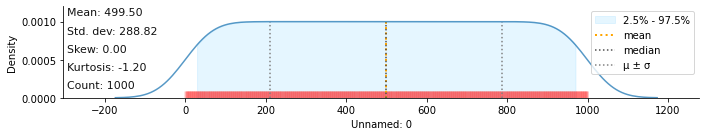

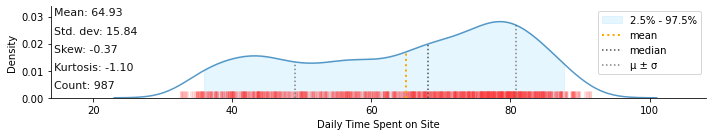

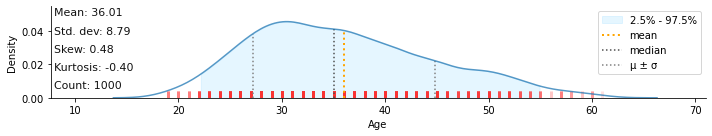

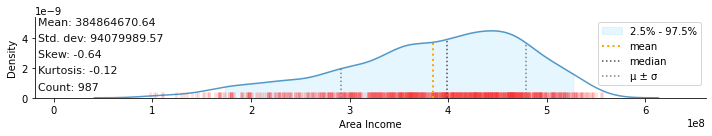

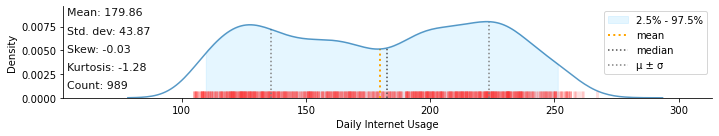

In [9]:
klib.dist_plot(nums, size=2)
plt.show()
#plt.savefig('klibstatisticnum.png', dpi=200)

In [10]:
cats.describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


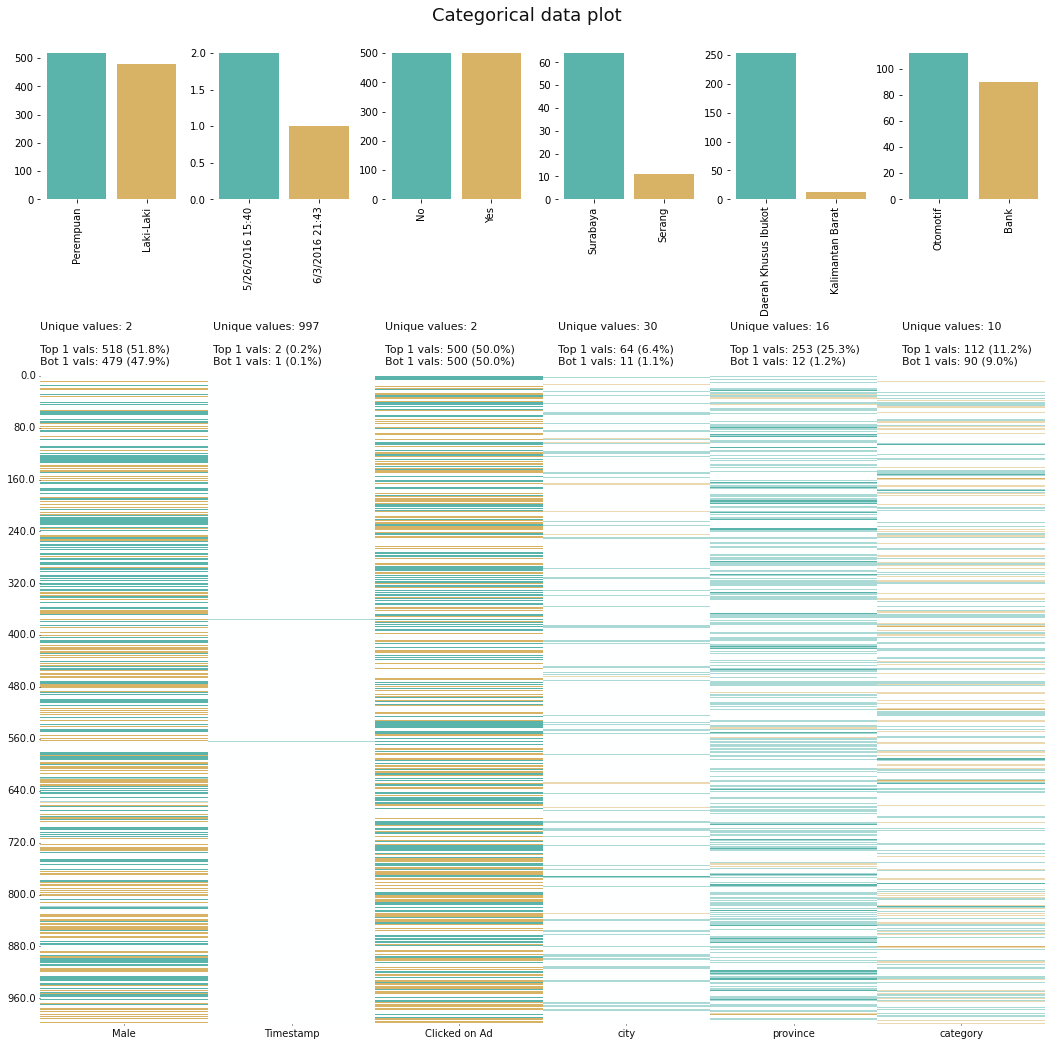

In [11]:
klib.cat_plot(cats, top = 1, bottom = 1, )
plt.show()
#plt.savefig('klibstatisticcat.png', dpi = 200)

**Observation**

* 'Daily Time Spent on Site' and 'Area Income' feature are considered negatively skewed
* 'Age' feature is considered positively skewed
* 'Daily Internet Usage' feature is considered as normally distributed
* Target feature is already on balanced condition
* There are skewness in some of the features but below 1 / -1 , so it is considerable as normal.

## Univariate Analysis

### Numerical Feature

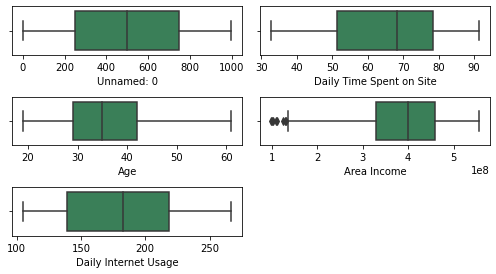

In [12]:
df1 = df.copy()

nums = list(df1.select_dtypes(exclude = 'object'))
plt.figure(figsize=(7,6))
for i in range(0, len(nums)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=df1[nums[i]], color='seagreen')
    plt.xlabel(nums[i])
    plt.tight_layout()
#plt.savefig('numbox.png', dpi = 200)

**Observtion**

Area income is the only one numerical feature that has outliers

### Categorical Feature

In [13]:
#create month feature as representative for timestamp
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df1['month'] = df1['Timestamp'].dt.month
df1.drop(columns=['Timestamp'], inplace = True)

In [14]:
df1.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,province,category,month
0,0,68.95,35,432837300.0,256.09,Perempuan,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3
1,1,80.23,31,479092950.0,193.77,Laki-Laki,No,Denpasar,Bali,Food,4
2,2,69.47,26,418501580.0,236.50,Perempuan,No,Surabaya,Jawa Timur,Electronic,3
3,3,74.15,29,383643260.0,245.89,Laki-Laki,No,Batam,Kepulauan Riau,House,1
4,4,68.37,35,517229930.0,225.58,Perempuan,No,Medan,Sumatra Utara,Finance,6


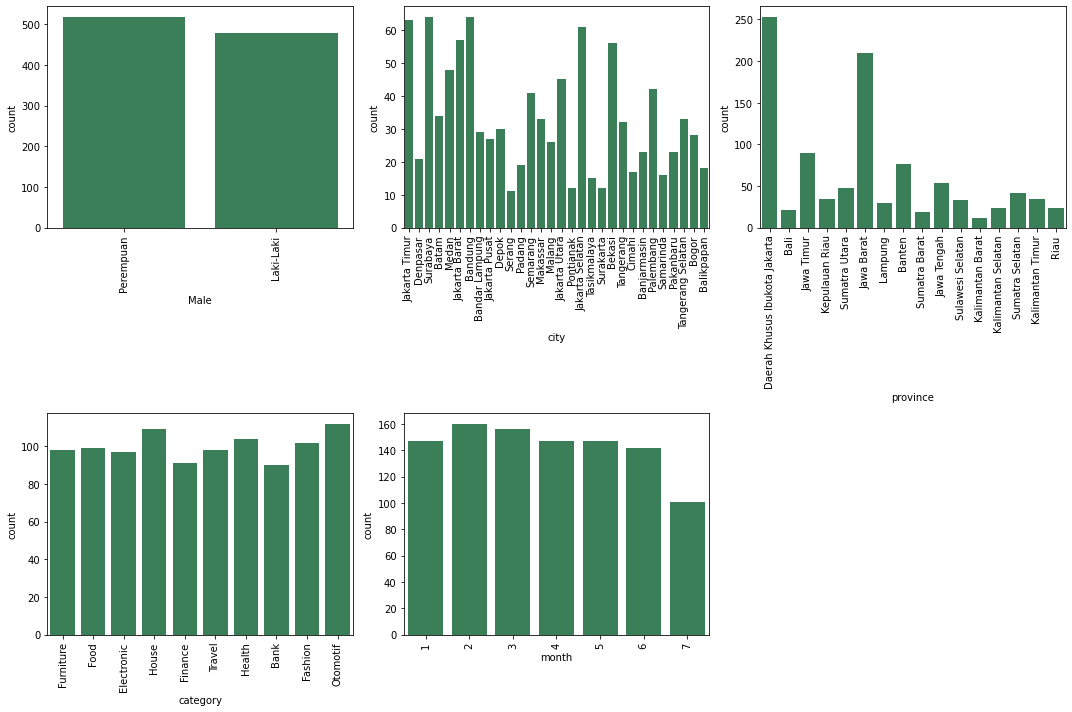

In [15]:
cats = ['Male','city','province','category','month']

plt.figure(figsize=(15,10))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df1[cats[i]], color='seagreen')
    plt.xlabel(cats[i])
    plt.xticks(rotation=90)
    plt.tight_layout()
#plt.savefig('catcount.png', dpi = 200)

**Observations**

* 'Male' feature is dominated by Perempuan
* From 'city' feature, most of the users are from Surabaya, but according to the 'province' feature, DKI Jakarta has the highest population of users
* Otomotif is the most picked category 
* The highest users activity was on February 
* Target feature is already balanced

## Bivariate Analysis

### Numerical Feature

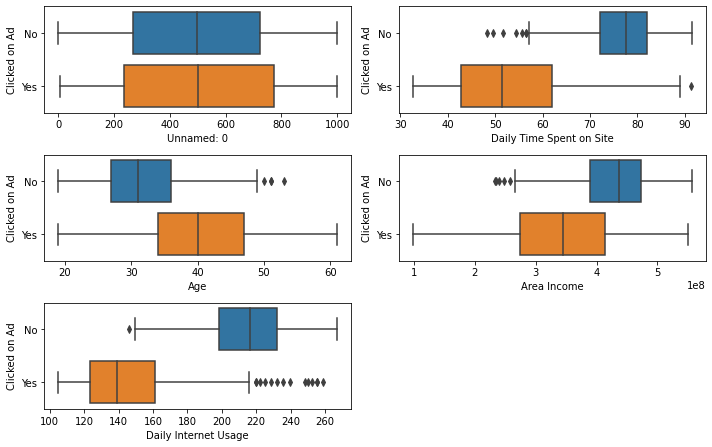

In [16]:
plt.figure(figsize=(10,10))
for i in range(0, len(nums)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=df1[nums[i]], y = df1['Clicked on Ad'])
    plt.xlabel(nums[i])
    plt.tight_layout()
#plt.savefig('numboxbivariate.png', dpi = 200)

<Figure size 576x576 with 0 Axes>

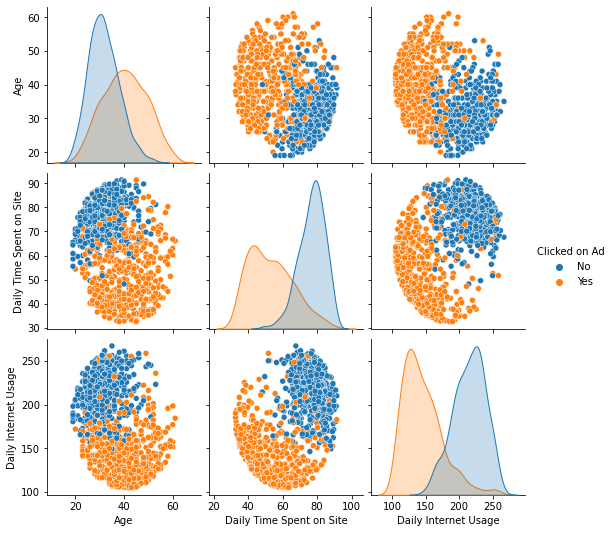

In [17]:
plt.figure(figsize=(8, 8))
sns.pairplot(df1[['Age','Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']], diag_kind='kde',hue='Clicked on Ad')
plt.show()
#plt.savefig('numscatter.png', dpi = 200)

**Observations**

* From above, the behavior of users can be classified into 2 types. Active users are they who have more time to spent on a site and have a high average time of daily internet usage. Non-active users are the opposite of the active users behaviour.
* Most of active users did not interested in clicking the advertisement. They tend to spend their time on the site over 60 minutes daily, and have an average internet usage ove 150 minutes per day. Most of them are in the age of 30's, and have a slightlly higher in incomes than the non-active users.
* Most of non-active users were interested in clicking the advertisement. They have around 45-65 minutes of daily time spent on the site, and have around 120-160 minutes of average daily internet usage. Most of them are in the age of 40's and have a slighty lower in incomes, around 300 to 400 Mio.

### Categorical Feature


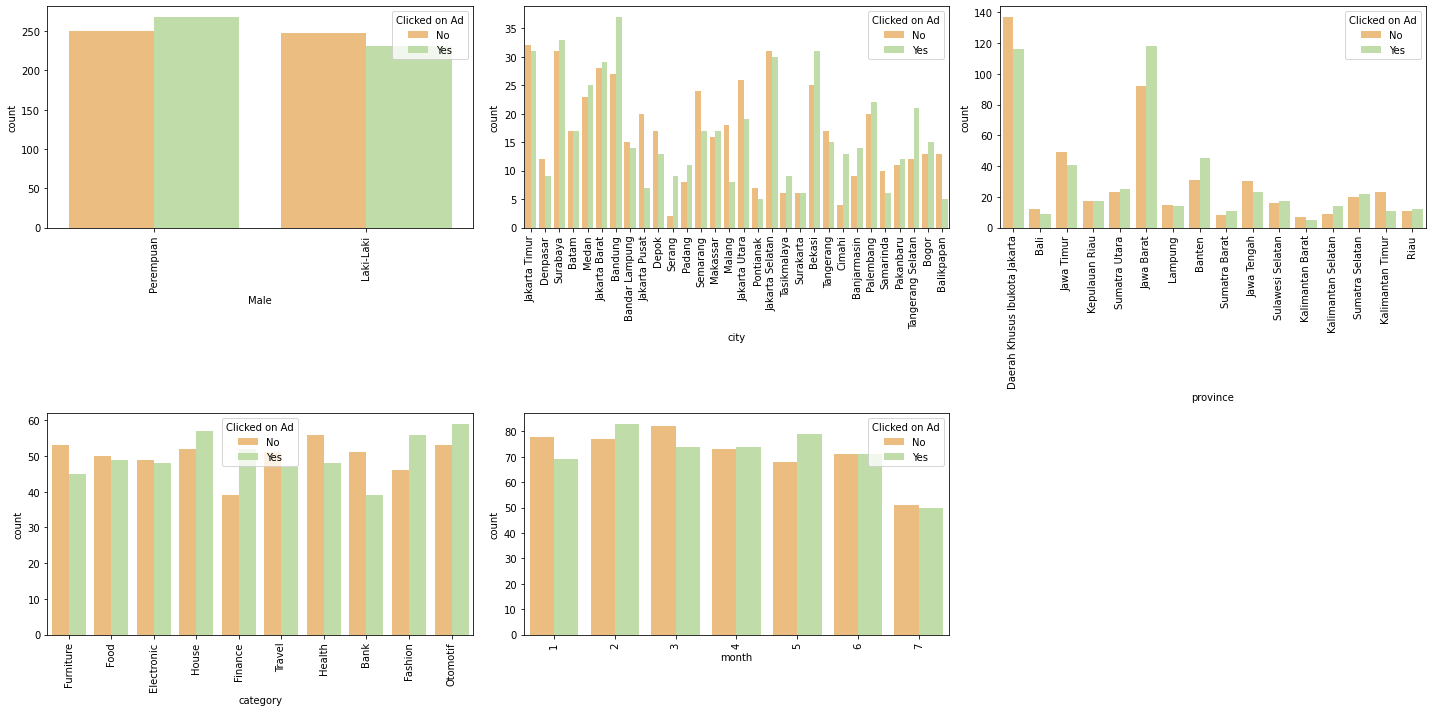

In [18]:
plt.figure(figsize=(20,10))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df1[cats[i]], palette='Spectral', hue = df1['Clicked on Ad'])
    plt.xlabel(cats[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

#plt.savefig('catbivariate.png', dpi = 200)

**Observations**

* Female users tend to click on ads more than male
* Every month, the comparison of the number of users who click / not Ads are not significant. But the total number of users was decreased from February to July
* The number of users who clicked on Ads was more than those who didn't click on Ads in 13 of the 30 cities
* Users from West Java clicked on Ads more than those who didn't click on Ads.
* House, Finance, Fashion and Automotive type of category were the most ads clicked by users 

## Multivariate Analysis

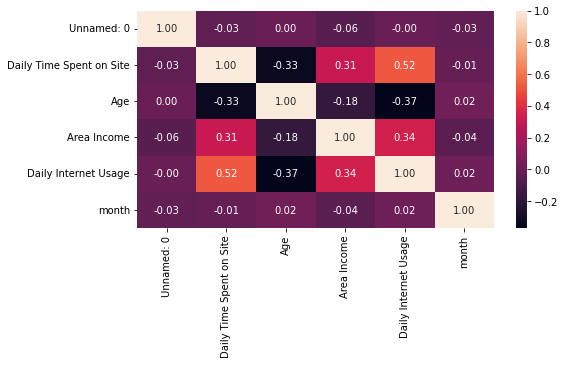

In [19]:
plt.figure(figsize=(8, 4))
sns.heatmap(df1.corr(), annot=True, fmt='.2f')
plt.show()
#plt.savefig('pearsoncorr1.png', dpi=200)

**Observations**

* The Daily Time Spent on Site feature has a strong positive correlation with Daily Internet Usage
* Feature Age has a weak negative correlation with Daily Time Spent on Site, Area Income, and Daily Internet Usage features
* The Area Income feature is positively correlated with the Daily Time Spent on Site and Daily Internet Usage features and negatively correlated with the Age feature.

# Data Preprocessing

In [20]:
df2 = df.copy()

In [21]:
list_item = []
for col in df2.columns :
    list_item.append([col, df2[col].dtype, df2[col].isna().sum(), 100*df2[col].isna().sum()/len(df2[col]), df2[col].nunique(), df2[col].unique()[:5]])
desc_df2 = pd.DataFrame(data=list_item, columns = 'Feature DataType Null NullPct UniqueNum UniqueSample'.split())
desc_df2

,Feature,DataType,Null,NullPct,UniqueNum,UniqueSample
0,Unnamed: 0,int64,0,0.0,1000,"[0, 1, 2, 3, 4]"
1,Daily Time Spent on Site,float64,13,1.3,890,"[68.95, 80.23, 69.47, 74.15, 68.37]"
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23]"
3,Area Income,float64,13,1.3,987,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,11,1.1,955,"[256.09, 193.77, 236.5, 245.89, 225.58]"
5,Male,object,3,0.3,2,"[Perempuan, Laki-Laki, nan]"
6,Timestamp,object,0,0.0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


In [22]:
df2.duplicated().any()

False

## Handling Null Values

In [23]:
# impute median for numerical feature
df2['Daily Time Spent on Site'].fillna(df2['Daily Time Spent on Site'].median(), inplace=True)
df2['Daily Internet Usage'].fillna(df2['Daily Internet Usage'].median(), inplace=True)
df2['Area Income'].fillna(df2['Area Income'].median(), inplace=True)

# impute mode for categorical feature
df2['Male'].fillna(df2['Male'].mode()[0], inplace=True)

In [24]:
df2.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

## Handling Outliers

<AxesSubplot:xlabel='Area Income'>

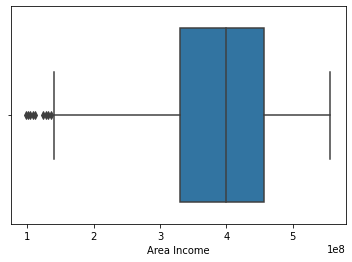

In [25]:
sns.boxplot(x = df2['Area Income'])

In [26]:
# Handling with IQR 
Q1 = (df2[['Area Income']]).quantile(0.25)
Q3 = (df2[['Area Income']]).quantile(0.75)

IQR = Q3 - Q1
print('The IQR value of each variable is: ')
print(IQR)

maximum = Q3 + (1.5*IQR)
print('Maximum Value of each Variable is:')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('\nManimum Value of each Variable is:')
print(minimum)
more_than = (df2 > maximum)
lower_than = (df2 < minimum)
df2 = df2.mask(more_than, maximum, axis=1)
df2 = df2.mask(lower_than, minimum, axis=1)
print('\nData distribution after outlier handling: ')
print(df[['Area Income']].describe())

The IQR value of each variable is: 
Area Income    126873075.0
dtype: float64
Maximum Value of each Variable is:
Area Income    647002825.0
dtype: float64

Manimum Value of each Variable is:
Area Income    139510525.0
dtype: float64

Data distribution after outlier handling: 
        Area Income
count  9.870000e+02
mean   3.848647e+08
std    9.407999e+07
min    9.797550e+07
25%    3.286330e+08
50%    3.990683e+08
75%    4.583554e+08
max    5.563936e+08


<AxesSubplot:xlabel='Area Income'>

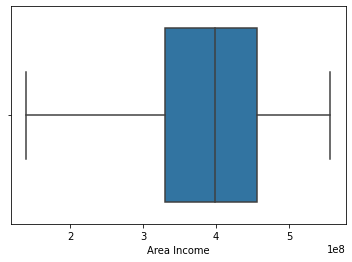

In [27]:
sns.boxplot(x = df2['Area Income'])

## Feature Extraction

In [28]:
# Extract datetime variables using timestamp column and converting timestamp column into datatime object in order to extract new features
df2['Timestamp'] = pd.to_datetime(df2['Timestamp']) 
# Create a new feature called Year
df2['Year'] = df2.Timestamp.dt.year
# Creates a new column called Month
df2['Month'] = df2.Timestamp.dt.month 
# Creates a new column called Week
df2['Week'] =df2.Timestamp.dt.isocalendar().week
# Creates a new column called Day
df2['Day'] = df2.Timestamp.dt.day
df2.head()
#drop outdated feature
df2.drop(columns = ['Timestamp'], inplace = True)

## Feature Selection

Unnamed: 0 will be dropped because it only represents index of each row and has no effect on target feature. City and province also needed to be dropped because they have high cardinality which can raise the curse of dimentionality when one hot encoding is performed.

In [29]:
df2.drop(columns=['Unnamed: 0','city','province'],inplace = True)

In [30]:
df2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,category,Year,Month,Week,Day
0,68.95,35,432837300.0,256.09,Perempuan,No,Furniture,2016,3,12,27
1,80.23,31,479092950.0,193.77,Laki-Laki,No,Food,2016,4,14,4
2,69.47,26,418501580.0,236.50,Perempuan,No,Electronic,2016,3,10,13
3,74.15,29,383643260.0,245.89,Laki-Laki,No,House,2016,1,1,10
4,68.37,35,517229930.0,225.58,Perempuan,No,Finance,2016,6,22,3


## Feature Encoding

In [31]:
df_encode = df2.copy()

In [32]:
#encoding Male to Gender feature
df_encode['gender'] = np.where(df_encode['Male']=='Laki-Laki',1,0)
#encoding Clicked on Ad to is_ad_clicked
df_encode['is_ad_clicked'] = np.where(df_encode['Clicked on Ad']=='No',0,1)

#OHE category
for cat in ['category']:
    onehot = pd.get_dummies(df_encode[cat], prefix=cat)
    df_encode = df_encode.join(onehot)
    
#drop outdated feature
df_encode.drop(columns=['Male','Clicked on Ad','category'],inplace = True)

In [33]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Year                      1000 non-null   int64  
 5   Month                     1000 non-null   int64  
 6   Week                      1000 non-null   UInt32 
 7   Day                       1000 non-null   int64  
 8   gender                    1000 non-null   int32  
 9   is_ad_clicked             1000 non-null   int32  
 10  category_Bank             1000 non-null   uint8  
 11  category_Electronic       1000 non-null   uint8  
 12  category_Fashion          1000 non-null   uint8  
 13  category_Finance          1000 non-null   uint8  
 14  category_

In [34]:
df_encode.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Year,Month,Week,Day,gender,is_ad_clicked,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,2016,3,12,27,0,0,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,2016,4,14,4,1,0,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,2016,3,10,13,0,0,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,2016,1,1,10,1,0,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,2016,6,22,3,0,0,0,0,0,1,0,0,0,0,0,0


## Split Data

In [35]:
dfclean = df_encode.copy()

In [36]:
X = dfclean.drop(columns=['is_ad_clicked'])
y = dfclean['is_ad_clicked'] # target / label

In [37]:
#Splitting into 70:30
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Modelling

In [38]:
#Create function
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import shap
import time
from sklearn.preprocessing import MinMaxScaler

## Without Normalization

### Logistic Regression

In [40]:
# List of hyperparameter 
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['liblinear', 'newton-cg','lbfgs']
multi_class= ['multinomial']
hyperparameters = dict(penalty=penalty, C=C, solver=solver, multi_class=multi_class)

# Initiation model
lr = LogisticRegression(random_state=42)
logreg_grid = GridSearchCV(lr, hyperparameters, cv=5, scoring='accuracy')#GridSearch with cross validation = 5

# Fitting Model & Evaluation
logreg_grid.fit(X_train, y_train)
y_pred = logreg_grid.predict(X_test)
eval_classification(logreg_grid)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.99
Precision (Test Set): 0.97
Recall (Train Set): 0.96
Recall (Test Set): 0.94
AUC (test-proba): 0.99
AUC (train-proba): 0.99


In [41]:
show_best_hyperparameter(logreg_grid)

{'C': 0.002, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [42]:
# iteration with the best parameters 
lr_tuned = LogisticRegression(random_state=42,
                              C=0.002,
                              penalty='l2',            
                              solver='newton-cg',
                              multi_class='multinomial'
                              ).fit(X_train, y_train)
eval_classification(lr_tuned)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.99
Precision (Test Set): 0.97
Recall (Train Set): 0.96
Recall (Test Set): 0.94
AUC (test-proba): 0.99
AUC (train-proba): 0.99


### Decision Tree Classifier

In [43]:
# List of hyperparameter
param_grid = { 
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [2,4,6,7,8],
    'min_samples_split' : [2, 5], 
    'min_samples_leaf' : [1, 2] 
}

# Initiation model
dtc=DecisionTreeClassifier(random_state=42)
dtc_grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
dtc_grid.fit(X_train, y_train)
y_pred = dtc_grid.predict(X_test)
eval_classification(dtc_grid)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.93
Precision (Train Set): 0.97
Precision (Test Set): 0.95
Recall (Train Set): 0.95
Recall (Test Set): 0.92
AUC (test-proba): 0.95
AUC (train-proba): 0.99


In [44]:
show_best_hyperparameter(dtc_grid)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [45]:
# Iteration
dt_tuned = DecisionTreeClassifier(random_state=42, 
                                   max_depth=7, 
                                   min_samples_split=2,
                                   min_samples_leaf= 2,
                                   max_features='auto',
                                   criterion='gini').fit(X_train, y_train)

eval_classification(dt_tuned)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.93
Precision (Train Set): 0.97
Precision (Test Set): 0.95
Recall (Train Set): 0.95
Recall (Test Set): 0.92
AUC (test-proba): 0.95
AUC (train-proba): 0.99


### Random Forest Classifier

In [46]:
# List of hyperparameter
param_grid = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2, 5, 7], 
    'min_samples_leaf' : [2, 3], 
    'n_estimators': [100, 110],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}

# Initiation model
rfc=RandomForestClassifier(random_state=42)
rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
rfc_grid.fit(X_train, y_train)
y_pred = rfc_grid.predict(X_test)
eval_classification(rfc_grid)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.95
Precision (Train Set): 0.98
Precision (Test Set): 0.95
Recall (Train Set): 0.96
Recall (Test Set): 0.95
AUC (test-proba): 0.99
AUC (train-proba): 1.00


In [47]:
show_best_hyperparameter(rfc_grid)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 110, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [48]:
# Iteration
rf_tuned = RandomForestClassifier(random_state=42, 
                                   n_estimators=110, 
                                   max_depth=3, 
                                   criterion='gini',
                                   max_features= 'auto',
                                   min_samples_split=5, 
                                   min_samples_leaf=2).fit(X_train, y_train)
eval_classification(rf_tuned)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.95
Precision (Train Set): 0.98
Precision (Test Set): 0.95
Recall (Train Set): 0.96
Recall (Test Set): 0.95
AUC (test-proba): 0.99
AUC (train-proba): 1.00


### K-Nearest Neighbor

In [49]:
# List of hyperparameter
n_neighbors = list(range(1,40))
p=[1]
algorithm = ['brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')

# Fit Model & Evaluasi
knn_grid.fit(X_train, y_train)
y_pred = knn_grid.predict(X_test)
eval_classification(knn_grid)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.68
Precision (Train Set): 0.78
Precision (Test Set): 0.75
Recall (Train Set): 0.64
Recall (Test Set): 0.58
AUC (test-proba): 0.72
AUC (train-proba): 0.80


In [50]:
show_best_hyperparameter(knn_grid)

{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 24, 'p': 1, 'weights': 'uniform'}


In [51]:
# Iteration
knn_tuned = KNeighborsClassifier(n_neighbors =24, 
                                 p=1, 
                                 leaf_size=30,
                                 weights='uniform',
                                 algorithm = 'brute').fit(X_train, y_train)
eval_classification(knn_tuned)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.68
Precision (Train Set): 0.78
Precision (Test Set): 0.75
Recall (Train Set): 0.64
Recall (Test Set): 0.58
AUC (test-proba): 0.72
AUC (train-proba): 0.80


### AdaBoost Classifier

In [52]:
# List of hyperparameter
param_grid = { 
    'learning_rate': [0.001, 0.01, 1],
    'n_estimators': [20, 60, 80],
    'algorithm' : ['SAMME.R', 'SAMME']
}

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_grid = GridSearchCV(ab, param_grid, cv=5, scoring='accuracy')

# Predict & Evaluation
ab_grid.fit(X_train,y_train)
y_pred = ab_grid.predict(X_test)
eval_classification(ab_grid)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.99
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [53]:
show_best_hyperparameter(ab_grid)

{'algorithm': 'SAMME', 'base_estimator': None, 'learning_rate': 1, 'n_estimators': 60, 'random_state': 42}


In [54]:
# Iteration
ab_tuned = AdaBoostClassifier(random_state=42, 
                               n_estimators=60,
                               learning_rate=1, 
                               algorithm = 'SAMME').fit(X_train,y_train)
eval_classification(ab_tuned)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.99
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


### Gradient Boosting Classifier

In [55]:
# List of hyperparameter
param_grid = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2], 
    'min_samples_leaf' : [2], 
    'n_estimators': [30,50,80],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['friedman_mse'],
    'learning_rate' : [0.1],
    'loss': ['log_loss', 'exponential'],
    'subsample' : [1.0],
    
}


gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(estimator=gb, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
gb_grid.fit(X_train, y_train)
y_pred = gb_grid.predict(X_test)
eval_classification(gb_grid)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.94
Precision (Train Set): 0.99
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.94
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [56]:
show_best_hyperparameter(gb_grid)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [57]:
# Iteration
gb_tuned = GradientBoostingClassifier(max_depth= 2, 
                               min_samples_split=2,
                               min_samples_leaf =2,
                               n_estimators=50,
                               max_features='sqrt',
                               criterion='friedman_mse',
                               learning_rate=0.1,
                               loss='exponential',
                               subsample = 1.0).fit(X_train,y_train)
eval_classification(gb_tuned)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.99
Precision (Test Set): 0.96
Recall (Train Set): 0.96
Recall (Test Set): 0.94
AUC (test-proba): 0.98
AUC (train-proba): 1.00


### Evaluation

In [58]:
models_dict = {}
models_dict["Logistic Regression"] = lr_tuned
models_dict["Decision Tree"] = dt_tuned
models_dict["Random Forest"] = rf_tuned
models_dict["K-Nearest Neighbor"] = knn_tuned
models_dict["AdaBoost"] = ab_tuned
models_dict["Gradient Boosting"] = gb_tuned

In [59]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(X_train,y_train)

Training model Logistic Regression
Wall time: 475 ms
Training model Decision Tree
Wall time: 0 ns
Training model Random Forest
Wall time: 178 ms
Training model K-Nearest Neighbor
Wall time: 15.6 ms
Training model AdaBoost
Wall time: 93.4 ms
Training model Gradient Boosting
Wall time: 46.9 ms


In [60]:
# create list to store prediciton results
train_prediction_results = []
test_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"{model_name} Algorithm")
    # predict 
    model_pred_test = model.predict(X_test)
    test_prediction_results.append(model_pred_test)
    
    # append result to list
    model_pred_train = model.predict(X_train)
    train_prediction_results.append(model_pred_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"Elapsed time: {time_elapsed} ms")

Logistic Regression Algorithm
Elapsed time: 7.99 ms
Decision Tree Algorithm
Elapsed time: 6.01 ms
Random Forest Algorithm
Elapsed time: 37.84 ms
K-Nearest Neighbor Algorithm
Elapsed time: 78.69 ms
AdaBoost Algorithm
Elapsed time: 19.08 ms
Gradient Boosting Algorithm
Elapsed time: 0.0 ms


In [61]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    accuracy_train.append(accuracy_score(y_train, y_pred))
    confusion_m_train.append(confusion_matrix(y_train, y_pred))
    
# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    accuracy_test.append(accuracy_score(y_test, y_pred))
    confusion_m_test.append(confusion_matrix(y_test, y_pred))
models_name = list(models_dict.keys())

# create dataframe for model performances
eval_dict = {
    'Algorithm':models_dict.keys(),
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Precision_test': precision_test,
    'Precision_train': precision_train,
    'Time_Elapsed': train_val_time_elapsed
}
results1 = pd.DataFrame(data=eval_dict)
results1 = results1.set_index("Algorithm")
results1.sort_values(['Recall_test', 'Recall_train','Accuracy_test','Accuracy_train'], ascending = False)

,Accuracy_test,Accuracy_train,Recall_test,Recall_train,Precision_test,Precision_train,Time_Elapsed
Algorithm,,,,,,,
AdaBoost,0.950000,0.982857,0.954545,0.973988,0.948387,0.991176,19.08
Random Forest,0.946667,0.972857,0.948052,0.962428,0.948052,0.982301,37.84
Gradient Boosting,0.943333,0.972857,0.948052,0.959538,0.941935,0.985163,0.00
Logistic Regression,0.953333,0.975714,0.935065,0.959538,0.972973,0.991045,7.99
Decision Tree,0.930000,0.962857,0.915584,0.950867,0.946309,0.973373,6.01
K-Nearest Neighbor,0.683333,0.731429,0.577922,0.641618,0.747899,0.776224,78.69


**Observations**

* Most of the algorithm used have high score for train-test except K-Nearest Neighbor.
* The gap for train-test scores in each algortihm are not too large, meaning the algorithm and hyperparameter used are quite powerful to prevent overfitting and underfitting.
* The 2 highest test for accuracy are generated from **Logistic Regression** and **AdaBoost Classifier** 
* The 2 highest test for recall are generated from **AdaBoost Classifier** and **Random Forest Classifier**
* The 2 highest test score for precision are generated from **Logistic Regression** and **AdaBoost Classifier**

## With Normalization

In [62]:
minmax_scaler = MinMaxScaler()
X_train_norm = minmax_scaler.fit_transform(X_train)
X_test_norm = minmax_scaler.transform(X_test)

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test_norm)
    y_pred_train = model.predict(X_train_norm)
    y_pred_proba = model.predict_proba(X_test_norm)
    y_pred_proba_train = model.predict_proba(X_train_norm)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Logistic Regression

In [64]:
# List of hyperparameter 
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['liblinear', 'newton-cg','lbfgs']
multi_class= ['multinomial']
hyperparameters = dict(penalty=penalty, C=C, solver=solver, multi_class=multi_class)

# Initiation model
lr = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
logreg_grid = GridSearchCV(lr, hyperparameters, cv=5, scoring='accuracy')

# Fitting Model & Evaluation
logreg_grid.fit(X_train_norm, y_train)
y_pred = logreg_grid.predict(X_test_norm)
eval_classification(logreg_grid)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.93
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 0.90
Recall (Test Set): 0.88
AUC (test-proba): 0.99
AUC (train-proba): 0.99


In [65]:
show_best_hyperparameter(logreg_grid)

{'C': 0.002, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [66]:
# Iteration using best parameter before normalization
lr_tuned = LogisticRegression(random_state=42,
                              C=0.002,
                              penalty='l2',            
                              solver='newton-cg',
                              multi_class='multinomial'
                              ).fit(X_train_norm, y_train)
eval_classification(lr_tuned)

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.93
Precision (Train Set): 1.00
Precision (Test Set): 0.99
Recall (Train Set): 0.90
Recall (Test Set): 0.88
AUC (test-proba): 0.99
AUC (train-proba): 0.99


### Decision Tree Classifier

In [67]:
# List of hyperparameter
param_grid = { 
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [2,4,6,7,8],
    'min_samples_split' : [2, 5], 
    'min_samples_leaf' : [1, 2] 
}

# Initiation model
dtc=DecisionTreeClassifier(random_state=42)
dtc_grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
dtc_grid.fit(X_train_norm, y_train)
y_pred = dtc_grid.predict(X_test_norm)
eval_classification(dtc_grid)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.93
Precision (Train Set): 0.97
Precision (Test Set): 0.95
Recall (Train Set): 0.95
Recall (Test Set): 0.92
AUC (test-proba): 0.95
AUC (train-proba): 0.99


In [68]:
show_best_hyperparameter(dtc_grid)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [69]:
# Iteration using best parameter before normalization
dt_tuned = DecisionTreeClassifier(random_state=42, 
                                   max_depth=7, 
                                   min_samples_split=2,
                                   min_samples_leaf= 2,
                                   max_features='auto',
                                   criterion='gini').fit(X_train_norm, y_train)

eval_classification(dt_tuned)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.93
Precision (Train Set): 0.97
Precision (Test Set): 0.95
Recall (Train Set): 0.95
Recall (Test Set): 0.92
AUC (test-proba): 0.95
AUC (train-proba): 0.99


### Random Forest Classifier

In [70]:
# List of hyperparameter
param_grid = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2, 7, 9], 
    'min_samples_leaf' : [2, 3], 
    'n_estimators': [100, 110],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}

# Initiation model
rfc=RandomForestClassifier(random_state=42)
rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
rfc_grid.fit(X_train_norm, y_train)
y_pred = rfc_grid.predict(X_test_norm)
eval_classification(rfc_grid)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.95
Precision (Train Set): 0.98
Precision (Test Set): 0.95
Recall (Train Set): 0.96
Recall (Test Set): 0.95
AUC (test-proba): 0.99
AUC (train-proba): 1.00


In [71]:
show_best_hyperparameter(rfc_grid)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 110, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [72]:
# Iteration using best parameter before normalization
rf_tuned = RandomForestClassifier(random_state=42, 
                                   n_estimators=110, 
                                   max_depth=3, 
                                   criterion='gini',
                                   max_features= 'auto',
                                   min_samples_split=5, 
                                   min_samples_leaf=2).fit(X_train_norm, y_train)
eval_classification(rf_tuned)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.95
Precision (Train Set): 0.98
Precision (Test Set): 0.95
Recall (Train Set): 0.96
Recall (Test Set): 0.95
AUC (test-proba): 0.99
AUC (train-proba): 1.00


### K-Nearest Neighbor

In [73]:
# List of hyperparameter
n_neighbors = list(range(1,40))
p=[1]
algorithm = ['brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')

# Fit Model & Evaluasi
knn_grid.fit(X_train_norm, y_train)
y_pred = knn_grid.predict(X_test_norm)
eval_classification(knn_grid)

Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.89
Precision (Train Set): 0.99
Precision (Test Set): 0.96
Recall (Train Set): 0.87
Recall (Test Set): 0.81
AUC (test-proba): 0.98
AUC (train-proba): 0.98


In [74]:
show_best_hyperparameter(knn_grid)

{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 35, 'p': 1, 'weights': 'uniform'}


In [75]:
# Iteration using best parameter before normalization
knn_tuned = KNeighborsClassifier(n_neighbors =24, 
                                 p=1, 
                                 leaf_size=30,
                                 weights='uniform',
                                 algorithm = 'brute').fit(X_train_norm, y_train)
eval_classification(knn_tuned)

Accuracy (Train Set): 0.92
Accuracy (Test Set): 0.88
Precision (Train Set): 1.00
Precision (Test Set): 0.98
Recall (Train Set): 0.84
Recall (Test Set): 0.79
AUC (test-proba): 0.98
AUC (train-proba): 0.98


### AdaBoost Classifier

In [76]:
# List of hyperparameter
param_grid = { 
    'learning_rate': [0.001, 0.01, 1],
    'n_estimators': [20, 60, 80],
    'algorithm' : ['SAMME.R', 'SAMME']
}

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_grid = GridSearchCV(ab, param_grid, cv=5, scoring='accuracy')

# Predict & Evaluation
ab_grid.fit(X_train_norm,y_train)
y_pred = ab_grid.predict(X_test_norm)
eval_classification(ab_grid)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.99
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [77]:
show_best_hyperparameter(ab_grid)

{'algorithm': 'SAMME', 'base_estimator': None, 'learning_rate': 1, 'n_estimators': 60, 'random_state': 42}


In [78]:
# Iteration using best parameter before normalization
ab_tuned = AdaBoostClassifier(random_state=42, 
                               n_estimators=60,
                               learning_rate=1, 
                               algorithm = 'SAMME').fit(X_train_norm,y_train)
eval_classification(ab_tuned)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.99
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


### Gradient Boosting Classifier

In [79]:
# List of hyperparameter
param_grid = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2], 
    'min_samples_leaf' : [2], 
    'n_estimators': [30,50,80],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['friedman_mse'],
    'learning_rate' : [0.1],
    'loss': ['log_loss', 'exponential'],
    'subsample' : [1.0],
    
}


gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(estimator=gb, param_grid=param_grid, cv= 5, scoring='accuracy')

# Fitting Model & Evaluation
gb_grid.fit(X_train_norm, y_train)
y_pred = gb_grid.predict(X_test_norm)
eval_classification(gb_grid)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 0.98
Recall (Test Set): 0.94
AUC (test-proba): 0.98
AUC (train-proba): 1.00


In [80]:
show_best_hyperparameter(gb_grid)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [81]:
# Iteration using best parameter before normalization
gb_tuned = GradientBoostingClassifier(max_depth= 2, 
                               min_samples_split=2,
                               min_samples_leaf =2,
                               n_estimators=50,
                               max_features='sqrt',
                               criterion='friedman_mse',
                               learning_rate=0.1,
                               loss='exponential',
                               subsample = 1.0).fit(X_train_norm,y_train)
eval_classification(gb_tuned)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95
Precision (Train Set): 0.99
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.95
AUC (test-proba): 0.98
AUC (train-proba): 1.00


### Evaluation

In [82]:
models_dict = {}
models_dict["Logistic Regression"] = lr_tuned
models_dict["Decision Tree"] = dt_tuned
models_dict["Random Forest"] = rf_tuned
models_dict["KNearest Neighbor"] = knn_tuned
models_dict["AdaBoost"] = ab_tuned
models_dict["Gradient Boosting"] = gb_tuned

In [83]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(X_train_norm, y_train)

Training model Logistic Regression
Wall time: 10.4 ms
Training model Decision Tree
Wall time: 10.8 ms
Training model Random Forest
Wall time: 196 ms
Training model KNearest Neighbor
Wall time: 0 ns
Training model AdaBoost
Wall time: 94 ms
Training model Gradient Boosting
Wall time: 31.1 ms


In [84]:
# create list to store prediciton results
train_prediction_results = []
test_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"{model_name} Algorithm")
    # predict 
    model_pred_test = model.predict(X_test_norm)
    test_prediction_results.append(model_pred_test)
    
    # append result to list
    model_pred_train = model.predict(X_train_norm)
    train_prediction_results.append(model_pred_train)
    
    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"Elapsed time: {time_elapsed} ms")

Logistic Regression Algorithm
Elapsed time: 1.0 ms
Decision Tree Algorithm
Elapsed time: 2.0 ms
Random Forest Algorithm
Elapsed time: 20.53 ms
KNearest Neighbor Algorithm
Elapsed time: 85.63 ms
AdaBoost Algorithm
Elapsed time: 21.0 ms
Gradient Boosting Algorithm
Elapsed time: 2.14 ms


In [85]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    accuracy_train.append(accuracy_score(y_train, y_pred))
    confusion_m_train.append(confusion_matrix(y_train, y_pred))
    
# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    accuracy_test.append(accuracy_score(y_test, y_pred))
    confusion_m_test.append(confusion_matrix(y_test, y_pred))
models_name = list(models_dict.keys())

# create dataframe for model performances
eval_dict = {
    'Algorithm':models_dict.keys(),
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Precision_test': precision_test,
    'Precision_train': precision_train,
    'Time_Elapsed': train_val_time_elapsed
}
results2 = pd.DataFrame(data=eval_dict)
results2 = results2.set_index("Algorithm")
results2.sort_values(['Recall_test', 'Recall_train','Accuracy_test','Accuracy_train'], ascending = False)

,Accuracy_test,Accuracy_train,Recall_test,Recall_train,Precision_test,Precision_train,Time_Elapsed
Algorithm,,,,,,,
AdaBoost,0.950000,0.982857,0.954545,0.973988,0.948387,0.991176,21.00
Random Forest,0.946667,0.972857,0.948052,0.962428,0.948052,0.982301,20.53
Gradient Boosting,0.940000,0.981429,0.928571,0.971098,0.953333,0.991150,2.14
Decision Tree,0.930000,0.962857,0.915584,0.950867,0.946309,0.973373,2.00
Logistic Regression,0.933333,0.951429,0.876623,0.901734,0.992647,1.000000,1.00
KNearest Neighbor,0.880000,0.918571,0.785714,0.838150,0.975806,0.996564,85.63


**Observations**

* There is a significant increase of train-test score after normalizing the data for K-Nearest Neighbor algorithm.
* The 2 highest test score for Accuracy are generated from **AdaBoost Classifier** and **Random Forest Classifier**
* The 2 highest test score for Recall are generated from **AdaBoost Classifier** and **Random Forest Classifier**
* The 2 highest test score for Precision are generated from **Logistic Regression** and **K-Nearest Neighbor**

According to these results, **AdaBoost Classifier** is selected as the best algorithm even though the time required for running the model is not the fastest.

## Best Algorithm: AdaBoost Classifier

### Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix of AdaBoost Classifier')

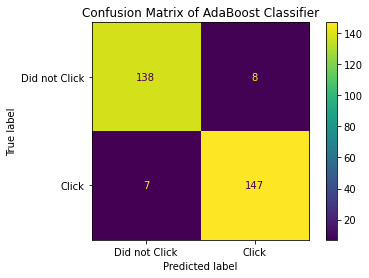

In [86]:
plot_confusion_matrix(models_dict["AdaBoost"], X_test_norm, y_test, values_format='d', display_labels=['Did not Click','Click'],cmap='viridis')
plt.title("Confusion Matrix of AdaBoost Classifier")
#plt.savefig('confusion_matrix.png', dpi=200)

From the matrix confusion above, AdaBoost Classifier has proven to be the best algorithm for its high accuracy with high recall. It can classify most of the users who clicked and did not click the ads with minimum errors both for false positive and false negative.

In [103]:
X_test.shape

(300, 19)

In [105]:
y_test.value

1    154
0    146
Name: is_ad_clicked, dtype: int64

### Feature Importance

In [87]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

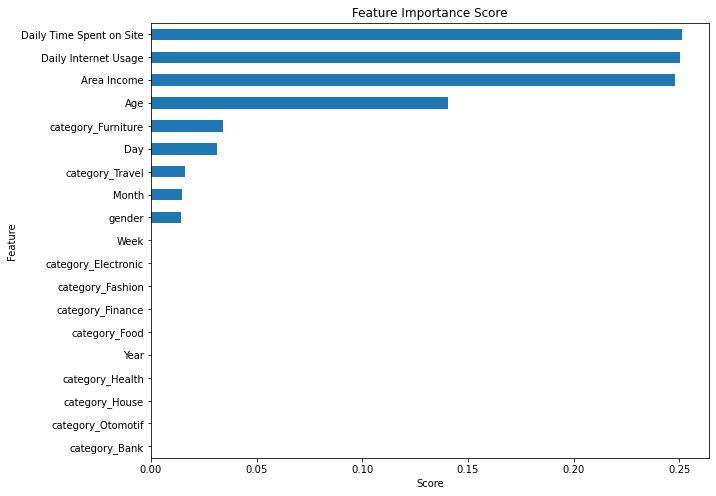

In [88]:
show_feature_importance(ab_tuned)
# plt.savefig('feature_importance.png', dpi=200)

**Observations**

Top 5 feature importance are:
* `Daily Time Spent on Site`
* `Daily Internet Usage`
* `Area Income`
* `Age`
* `category_Furniture`

These features are very good in determining whether a user will click on the ads or not. 

# Business Recomendation

From feature importance, `Daily Time Spent on Site`, and `Daily Internet Usage` are 2 of 5 best features for model predicting. These 2 feautres were also confirmed in EDA to have a certain relationship, creating 2 types of users which are `Active Users` who was not interested in clicking the ads, and `Non-active Users` who was interested.

Ads improvement is related to Click Through Rate (CTR), a metric that usually used to measure the impact of a certain ads and gaining revenue from it. CTR basically calculate the actual ads clicked devided by the total of ads given, times with 100 to convert it in precentage. The higher CTR, the higher the impact of an ads, the more revenue gained.

Recomendation for improving the Ads which will affect the CTR are:
* Use negative keywords
* Increase the bid
* Use treadmarks or registered symbols in headlines
* Add sitelink extension
* Have a strong Call-to-Action (CTA)
* Put main keyword in displayed URL
* Write compelling ad copy
* Choose right keywords and correct negative keywords
* Focus on benefits and not on features
* Make full use of ad extensions

Source : https://ducttapemarketing.com/increase-ppc-ctr/

# Simulation

## Previous CTR

To know the impact of Ad improvement, first we need to look at current CTR on different ads category given

In [89]:
dfsim = df2.copy()

In [90]:
dfsim.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,category,Year,Month,Week,Day
0,68.95,35,432837300.0,256.09,Perempuan,No,Furniture,2016,3,12,27
1,80.23,31,479092950.0,193.77,Laki-Laki,No,Food,2016,4,14,4
2,69.47,26,418501580.0,236.50,Perempuan,No,Electronic,2016,3,10,13
3,74.15,29,383643260.0,245.89,Laki-Laki,No,House,2016,1,1,10
4,68.37,35,517229930.0,225.58,Perempuan,No,Finance,2016,6,22,3


In [91]:
dfsim['is_ad_clicked'] = np.where(dfsim['Clicked on Ad']=='No',0,1)
dfsim.drop(columns=['Clicked on Ad'], inplace=True)

In [92]:
def user_type(dfsim):
    if (dfsim['Daily Time Spent on Site']>=60) and (dfsim['Daily Internet Usage']>=150):
        return 'Active User'
    else :
        return 'Non-Active User'

In [93]:
dfsim['User Type'] = dfsim.apply(user_type, axis=1)

In [94]:
dfsim['User Type'].value_counts()

Active User        535
Non-Active User    465
Name: User Type, dtype: int64

In [95]:
dfsim1=dfsim[dfsim['is_ad_clicked']==1].copy()
df_ad_clicked = dfsim1.groupby(['category','User Type']).agg({'is_ad_clicked':'count'}).reset_index()
df_ad_clicked.rename(columns={'is_ad_clicked':'Ads_Clicked'}, inplace=True)

df_total_ad = dfsim.groupby(['category'])['is_ad_clicked'].count().reset_index()
df_total_ad.rename(columns={'is_ad_clicked':'Total_Ads_Given'}, inplace=True)
dfimpact = df_ad_clicked.merge(df_total_ad, on = ['category'])

dfimpact['CTR'] = round((dfimpact['Ads_Clicked']/dfimpact['Total_Ads_Given'])*100,2)
dfimpact


,category,User Type,Ads_Clicked,Total_Ads_Given,CTR
0,Bank,Active User,6,90,6.67
1,Bank,Non-Active User,33,90,36.67
2,Electronic,Active User,5,97,5.15
3,Electronic,Non-Active User,43,97,44.33
4,Fashion,Active User,5,102,4.90
5,Fashion,Non-Active User,51,102,50.00
6,Finance,Active User,7,91,7.69
7,Finance,Non-Active User,45,91,49.45
8,Food,Active User,7,99,7.07
9,Food,Non-Active User,42,99,42.42


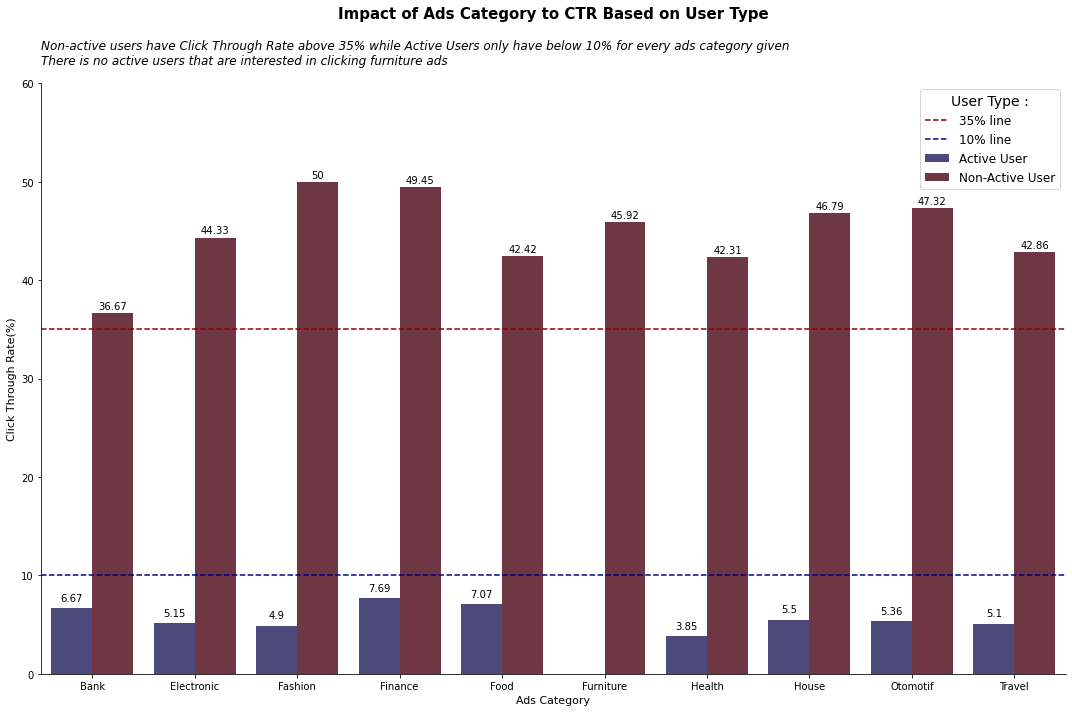

In [96]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='category', y='CTR', data=dfimpact, hue='User Type', palette='icefire')

plt.title("Impact of Ads Category to CTR Based on User Type", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-0.5, y=62, s="Non-active users have Click Through Rate above 35% while Active Users only have below 10% for every ads category given \nThere is no active users that are interested in clicking furniture ads", fontsize=12, fontstyle='italic')

plt.axhline(35, ls='--', color='darkred', label='35% line')
plt.axhline(10, ls='--', color='darkblue', label='10% line')
plt.xlabel('Ads Category', fontsize=11)
plt.ylabel('Click Through Rate(%)', fontsize=11)
plt.ylim(0, 60)
plt.legend (title='User Type :', title_fontsize=14, prop={'size':12})

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)
sns.despine()
plt.tight_layout()
#plt.savefig('sim1.png', dpi=200)

## Expected CTR

Assume all the recomendations were performed and increased the ads clicked by the market target which is the `Active Users` up tp 10% from the total ads per category given.

In [97]:
# category Bank
dfbank = dfsim[(dfsim['is_ad_clicked']==0) & (dfsim['User Type']=='Active User') &(dfsim['category']=='Bank')]
dfbank['is_ad_clicked'][:9] = 1 # 9 is 10# from the 90 total given ads for this category
dfsim3 = dfsim1.append(dfbank[dfbank['is_ad_clicked']==1])

# category Electronic
dfelec = dfsim[(dfsim['is_ad_clicked']==0) & (dfsim['User Type']=='Active User') & (dfsim['category']=='Electronic')]
dfelec['is_ad_clicked'][:10] = 1 # 10 is round 10% from the 97 total given ads for this category
dfsim3 = dfsim3.append(dfelec[dfelec['is_ad_clicked']==1])

# category Fashion
dffashion = dfsim[(dfsim['is_ad_clicked']==0) & (dfsim['User Type']=='Active User') & (dfsim['category']=='Fashion')]
dffashion['is_ad_clicked'][:10] = 1 # 10 is round 10% from the 102 total given ads for this category
dfsim3 = dfsim3.append(dffashion[dffashion['is_ad_clicked']==1])

#category Finance
dffinance = dfsim[(dfsim['is_ad_clicked']==0) & (dfsim['User Type']=='Active User') & (dfsim['category']=='Finance')]
dffinance['is_ad_clicked'][:9] = 1 # 9 is round 10% from the 91 total given ads for this category
dfsim3 = dfsim3.append(dffinance[dffinance['is_ad_clicked']==1])

#category Food
dffood = dfsim[(dfsim['is_ad_clicked']==0) & (dfsim['User Type']=='Active User') & (dfsim['category']=='Food')]
dffood['is_ad_clicked'][:10] = 1 # 10 is round 10% from 99 total given ads for this category
dfsim3 = dfsim3.append(dffood[dffood['is_ad_clicked']==1])

#category Furniture
dffur = dfsim[(dfsim['is_ad_clicked']==0) & (dfsim['User Type']=='Active User') & (dfsim['category']=='Furniture')]
dffur['is_ad_clicked'][:10] = 1 # 10 is round 10% from 98 total given ads for this category
dfsim3 = dfsim3.append(dffur[dffur['is_ad_clicked']==1])

#category Health
dfhealth = dfsim[(dfsim['is_ad_clicked']==0) & (dfsim['User Type']=='Active User') & (dfsim['category']=='Health')]
dfhealth['is_ad_clicked'][:10] = 1 # 10 is round 10% from 104 total given ads for this category
dfsim3 = dfsim3.append(dfhealth[dfhealth['is_ad_clicked']==1])

#category House
dfhouse = dfsim[(dfsim['is_ad_clicked']==0) & (dfsim['User Type']=='Active User') & (dfsim['category']=='House')]
dfhouse['is_ad_clicked'][:11] = 1 # 11 is round 10% of 109 total given ads for this category
dfsim3 = dfsim3.append(dfhouse[dfhouse['is_ad_clicked']==1])

#category Otomotif
dfoto = dfsim[(dfsim['is_ad_clicked']==0) & (dfsim['User Type']=='Active User') & (dfsim['category']=='Otomotif')]
dfoto['is_ad_clicked'][:11] = 1 # 11 is round 10% from 112 total given ads for this category
dfsim3 = dfsim3.append(dfoto[dfoto['is_ad_clicked']==1])

#category Travel
dftrav = dfsim[(dfsim['is_ad_clicked']==0) & (dfsim['User Type']=='Active User') & (dfsim['category']=='Travel')]
dftrav['is_ad_clicked'][:10] = 1 # 10 is round 10% from 98 total given ads for this category
dfsim3 = dfsim3.append(dftrav[dftrav['is_ad_clicked']==1])

In [98]:
df_ad_clicked = dfsim3.groupby(['category','User Type']).agg({'is_ad_clicked':'count'}).reset_index()
df_ad_clicked.rename(columns={'is_ad_clicked':'Ads_Clicked'}, inplace=True)

df_total_ad = dfsim.groupby(['category'])['is_ad_clicked'].count().reset_index()
df_total_ad.rename(columns={'is_ad_clicked':'Total_Ads_Given'}, inplace=True)
dfimpact2 = df_ad_clicked.merge(df_total_ad, on = ['category'])

dfimpact2['CTR'] = round((dfimpact2['Ads_Clicked']/dfimpact2['Total_Ads_Given'])*100,2)
dfimpact2

,category,User Type,Ads_Clicked,Total_Ads_Given,CTR
0,Bank,Active User,15,90,16.67
1,Bank,Non-Active User,33,90,36.67
2,Electronic,Active User,15,97,15.46
3,Electronic,Non-Active User,43,97,44.33
4,Fashion,Active User,15,102,14.71
5,Fashion,Non-Active User,51,102,50.00
6,Finance,Active User,16,91,17.58
7,Finance,Non-Active User,45,91,49.45
8,Food,Active User,17,99,17.17
9,Food,Non-Active User,42,99,42.42


In [99]:
dfimpact2_plot = dfimpact[dfimpact['User Type']=='Active User'].append(dfimpact2[dfimpact2['User Type']=='Active User'])
dfimpact2_plot['Status'] = np.where (dfimpact2_plot['Ads_Clicked']<10,'Before','After')

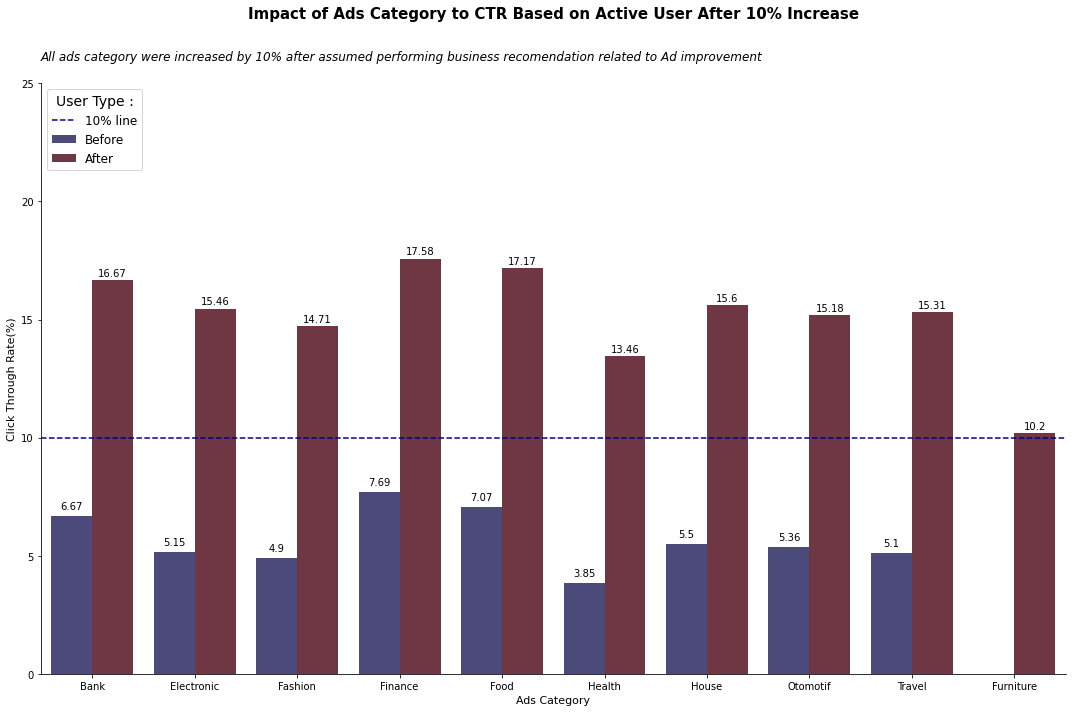

In [100]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='category', y='CTR', data=dfimpact2_plot, hue='Status', palette='icefire')

plt.title("Impact of Ads Category to CTR Based on Active User After 10% Increase", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-0.5, y=26, s="All ads category were increased by 10% after assumed performing business recomendation related to Ad improvement", fontsize=12, fontstyle='italic')

plt.axhline(10, ls='--', color='darkblue', label='10% line')
plt.xlabel('Ads Category', fontsize=11)
plt.ylabel('Click Through Rate(%)', fontsize=11)
plt.ylim(0, 25)
plt.legend (title='User Type :', title_fontsize=14, prop={'size':12})

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)
sns.despine()
plt.tight_layout()
#plt.savefig('sim2.png', dpi=200)

## Revenue Growth

**Profit gained before business recomendation**

Assuming the cost of ad for every category = Rp. 1000 and  gained per ads clicked = Rp. 5000

* Total Cost = cost ad per category * n user
* Total Cost = Rp. 1.000 * 1000
* Total Cost = Rp. 1.000.000

Before performing business recomendation, the total users that clicked the ads = 500 users

Therefore, 500 users x Rp. 5.000 = Rp. 2.500.000

Profit gained = Rp. 2.500.000 - Rp. 1.000.000 = **Rp. 1.500.000**

**Profit gained after business recomendation**

Since the increase after implementing business recomendation are 10% for active users who click the ads,
Total user that clicked ads = 610 users

Therefore, 610 users x Rp. 5.000 = Rp. 3.050.000

Profit gained = Rp. 3.050.000 - Rp. 1.000.000 = **Rp. 2.050.000**

Profit growth after business recomendation = **73%**
